# In this coding challenge, I'll try to make an holistic program which will help me to analyze and compile the raw football data from different leagues as home games and away games to see the team performances both home and away. The goal will be having a visualizable data set. At some points there are much easier ways for example retrieving the column names but I was aiming to learn some structures so I intentionally walked those long lanes. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
league_index = {"1":"prem","2":"superlig"} # considering there will be other league datas in the future, i'd like to design an holistic program for all

que = input("Submit 1 for Premier League, 2 for Super League:")

In [38]:
matchdata = pd.read_csv("../footballdata/{:}/2019-2020.csv".format(league_index[que])) #read the csv data from the related directory and format the file name with a variable to make the program understand the changes in league coices

real_cols = matchdata.columns.to_list()
col_names = []
info = open("../footballdata/notes football data.txt").readlines() # read the metadata to find the column name
print(real_cols)

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']


In [39]:
# knowing the structure of the txt metadata, there are some explanations about the column names so we will be obtaining these as our column names and appending to col_names in the for structure
for line in info:
    str_line = str(line)
    finder = re.findall(r"(^\w*).*=",str_line)
    if len(finder) >= 1 and finder[0] in real_cols :
        col_names.append(finder[0])

In [40]:
count_until = col_names.index("AR")+1 # i don't need bet values or any odds so i made a variable for the index of the last column i'm gonna be working with

In [41]:
#while rearranging matchdata, we used the same format structure but we used the columns that we already found out in metadata and sliced the col_names list and shaved the list as we wished
matchdata = pd.read_csv("../footballdata/{:}/2019-2020.csv".format(league_index[que]),usecols=col_names[:count_until]) 
#the date and time columns are seperated and they dont seem to be "datetime64" format, so we'll be joining them together and rearranging the format so in the future we can sort by the date. 
# For example we can parse the data starting from lockdown in pandemic then see the effect of pandemic to some sorta stuff
matchdata["Date"] = [" ".join(value) for value in zip(matchdata["Date"],matchdata["Time"])]
matchdata["Date"] = pd.to_datetime(matchdata["Date"])
matchdata.drop("Time",axis=1,inplace=True) #dropped the time column, we dont need it anymore

In [42]:
print(real_cols) # let's visually see what columns we have

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']


In [43]:
print(col_names) # these are the columns that we want

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'VCH', 'VCD', 'VCA', 'WHH', 'WHD', 'WHA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA']


In [44]:
print(matchdata.head(10))
print(matchdata.info())

  Div                Date        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0 2019-09-08 20:00:00       Liverpool           Norwich     4     1   H   
1  E0 2019-10-08 12:30:00        West Ham          Man City     0     5   A   
2  E0 2019-10-08 15:00:00     Bournemouth  Sheffield United     1     1   D   
3  E0 2019-10-08 15:00:00         Burnley       Southampton     3     0   H   
4  E0 2019-10-08 15:00:00  Crystal Palace           Everton     0     0   D   
5  E0 2019-10-08 15:00:00         Watford          Brighton     0     3   A   
6  E0 2019-10-08 17:30:00       Tottenham       Aston Villa     3     1   H   
7  E0 2019-11-08 14:00:00       Leicester            Wolves     0     0   D   
8  E0 2019-11-08 14:00:00       Newcastle           Arsenal     0     1   A   
9  E0 2019-11-08 16:30:00      Man United           Chelsea     4     0   H   

   HTHG  HTAG HTR  ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0     4     0   H  ...   7    5   9   9  11   2   0   2   0   0 

In [45]:
#collecting their unique values in a list and sorting it by name
team_list = matchdata["HomeTeam"].unique().tolist()
team_list.sort()

#these two items will start making sense after a while
home_team_df_list = []
away_team_df_list = []

In [46]:
# obtaining individual team dataframes played in home games, avoiding tracebacks from dropping a nonexistent column by using try/except structure
for team in team_list:
    home_actual_team = matchdata["HomeTeam"] == team
    home_actual_team_df = matchdata[home_actual_team]
    try:
        home_actual_team_df.drop("Referee",axis=1)
        home_team_df_list.append(home_actual_team_df) # putting dataframes in a list so that i can operate using the same index numbers with team_list to obtain individual teamdatas
    except:
        home_team_df_list.append(home_actual_team_df)
        continue

In [47]:
#and for away games:
for team in team_list:
    away_actual_team = matchdata["AwayTeam"] == team
    away_actual_team_df = matchdata[away_actual_team]
    try:
        away_actual_team_df.drop("Referee",axis=1)
        away_team_df_list.append(away_actual_team_df) # putting dataframes in a list so that i can operate using the same index numbers with team_list to obtain individual teamdatas
    except:
        away_team_df_list.append(away_actual_team_df)
        continue

In [48]:
print(home_team_df_list[:2]) #let's see the first three item in the list

[    Div                Date HomeTeam          AwayTeam  FTHG  FTAG FTR  HTHG  \
10   E0 2019-08-17 12:30:00  Arsenal           Burnley     2     1   H     1   
39   E0 2019-01-09 16:30:00  Arsenal         Tottenham     2     2   D     1   
58   E0 2019-09-22 16:30:00  Arsenal       Aston Villa     3     2   H     0   
76   E0 2019-06-10 14:00:00  Arsenal       Bournemouth     1     0   H     1   
97   E0 2019-10-27 16:30:00  Arsenal    Crystal Palace     2     2   D     2   
101  E0 2019-02-11 15:00:00  Arsenal            Wolves     1     1   D     1   
121  E0 2019-11-23 15:00:00  Arsenal       Southampton     2     2   D     1   
149  E0 2019-05-12 20:15:00  Arsenal          Brighton     1     2   A     0   
168  E0 2019-12-15 16:30:00  Arsenal          Man City     0     3   A     0   
196  E0 2019-12-29 14:00:00  Arsenal           Chelsea     1     2   A     1   
207  E0 2020-01-01 20:00:00  Arsenal        Man United     2     0   H     2   
220  E0 2020-01-18 15:00:00  Arsenal  S

In [49]:
home_team_dict = {}
away_team_dict = {}
# putting every column's sum in a nested dictionary 
for a in range(len(team_list)):
    actual_home = home_team_df_list[a]
    #print(actual_home)
    start_point = actual_home.columns.get_loc("FTHG")
    add_dict = dict()
    for col in actual_home.iloc[:,start_point:]:
        val_sum = actual_home[col].sum()
        if type(val_sum) is str:
            continue
        add_dict["{}".format(col)] = val_sum
    home_team_dict[team_list[a]] = add_dict

In [50]:
for a in range(len(team_list)):
    actual_away = away_team_df_list[a]
    start_point = actual_away.columns.get_loc("FTHG")
    add_dict = dict()
    for col in actual_away.iloc[:,start_point:]:
        val_sum = actual_away[col].sum()
        if type(val_sum) is str:
            continue
        add_dict["{}".format(col)] = val_sum
    away_team_dict[team_list[a]] = add_dict

# these two nested dictionaries will return us teams' home and away statistics individually


In [51]:
print(home_team_dict)

{'Arsenal': {'FTHG': 36, 'FTAG': 24, 'HTHG': 21, 'HTAG': 14, 'HS': 231, 'AS': 285, 'HST': 91, 'AST': 105, 'HF': 221, 'AF': 252, 'HC': 128, 'AC': 108, 'HY': 42, 'AY': 38, 'HR': 2, 'AR': 0}, 'Aston Villa': {'FTHG': 22, 'FTAG': 30, 'HTHG': 11, 'HTAG': 16, 'HS': 249, 'AS': 275, 'HST': 80, 'AST': 90, 'HF': 231, 'AF': 276, 'HC': 111, 'AC': 102, 'HY': 34, 'AY': 38, 'HR': 0, 'AR': 3}, 'Bournemouth': {'FTHG': 22, 'FTAG': 30, 'HTHG': 9, 'HTAG': 16, 'HS': 199, 'AS': 277, 'HST': 61, 'AST': 90, 'HF': 172, 'AF': 236, 'HC': 102, 'AC': 125, 'HY': 36, 'AY': 39, 'HR': 2, 'AR': 1}, 'Brighton': {'FTHG': 20, 'FTAG': 27, 'HTHG': 8, 'HTAG': 12, 'HS': 236, 'AS': 224, 'HST': 68, 'AST': 77, 'HF': 186, 'AF': 180, 'HC': 103, 'AC': 97, 'HY': 27, 'AY': 32, 'HR': 1, 'AR': 0}, 'Burnley': {'FTHG': 24, 'FTAG': 23, 'HTHG': 7, 'HTAG': 11, 'HS': 220, 'AS': 233, 'HST': 81, 'AST': 78, 'HF': 211, 'AF': 203, 'HC': 95, 'AC': 107, 'HY': 30, 'AY': 22, 'HR': 0, 'AR': 1}, 'Chelsea': {'FTHG': 30, 'FTAG': 16, 'HTHG': 16, 'HTAG': 5, 

In [52]:
# storing them in a variable as DataFrames so we can operate and visualize the data
home_team_df = pd.DataFrame(home_team_dict).transpose()
away_team_df = pd.DataFrame(away_team_dict).transpose()
print(home_team_df)

                  FTHG  FTAG  HTHG  HTAG   HS   AS  HST  AST   HF   AF   HC  \
Arsenal             36    24    21    14  231  285   91  105  221  252  128   
Aston Villa         22    30    11    16  249  275   80   90  231  276  111   
Bournemouth         22    30     9    16  199  277   61   90  172  236  102   
Brighton            20    27     8    12  236  224   68   77  186  180  103   
Burnley             24    23     7    11  220  233   81   78  211  203   95   
Chelsea             30    16    16     5  332  123  121   39  176  214  137   
Crystal Palace      15    20     4     8  231  218   68   82  207  251  111   
Everton             24    21    14     7  252  201   93   63  220  206  108   
Leicester           35    17    10     7  262  171   88   56  206  227  118   
Liverpool           52    16    29     7  314  172  129   58  156  170  144   
Man City            57    13    27     7  394  126  135   45  174  149  157   
Man United          40    17    21     9  299  163  

In [53]:
print(away_team_df)

                  FTHG  FTAG  HTHG  HTAG   HS   AS  HST  AST   HF   AF   HC  \
Arsenal             24    20    11     7  269  179   89   60  207  200  121   
Aston Villa         37    19     9     8  332  210   95   70  267  220  140   
Bournemouth         35    18    19    11  281  190  105   60  183  197  126   
Brighton            27    19    14     8  274  225   93   74  160  199  107   
Burnley             27    19    16     7  306  168   92   53  191  201  132   
Chelsea             38    39    16    20  199  293   78  102  183  210   69   
Crystal Palace      30    16    12     6  296  145   93   52  244  218  126   
Everton             35    20    16    13  226  218   85   69  204  252   94   
Leicester           24    32    13    14  209  275   81  102  233  212   92   
Liverpool           17    33     9    15  171  276   51  102  152  175   68   
Man City            22    45    10    21  153  351   70  128  163  187   51   
Man United          19    26     8    14  224  244  

In [54]:
# let's begin our visualization. i'll define a function that will allow me to see home and away scored and conceded goals visually. i'll divide my figures horizontally, putting together home goals scored in the left and conceded in the right.
from matplotlib.ticker import AutoMinorLocator
def home_vis_goal():
    general_team_fig = plt.figure(figsize=(20,12))
    general_team = general_team_fig.add_subplot(1,2,1)
    goals_scored_h = home_team_df.iloc[:,0] # the first column of the home dataframe is the sum  of the goals that this related team scored
    labels= goals_scored_h.keys()
    vals = goals_scored_h.values
    general_team.barh(range(len(labels)),vals, tick_label=labels, height=0.7)
    general_team.set_title("Home goals scored")
    general_team.xaxis.set_minor_locator(AutoMinorLocator())
    general_team = general_team_fig.add_subplot(1,2,2)
    general_team.set_title("Home goals conceded")
    goals_conc_h = home_team_df.iloc[:,1] # the second column of the home dataframe is the sum of the goals that this related team conceded
    labels= goals_conc_h.keys()
    vals = goals_conc_h.values
    general_team.barh(range(len(labels)),vals, tick_label=labels, height=0.7)
    general_team.xaxis.set_minor_locator(AutoMinorLocator())
    return plt.show()
def away_vis_goal():
    general_team_fig = plt.figure(figsize=(20,12))
    general_team = general_team_fig.add_subplot(1,2,1)
    goals_scored_a = away_team_df.iloc[:,1] # the second column of the away dataframe is the sum of the goals that this related team scored
    labels= goals_scored_a.keys()
    vals = goals_scored_a.values
    general_team.barh(range(len(labels)),vals, tick_label=labels, height=0.7)
    general_team.set_title("Away goals scored")
    general_team.xaxis.set_minor_locator(AutoMinorLocator())
    general_team = general_team_fig.add_subplot(1,2,2)
    general_team.set_title("Away goals conceded")
    goals_conc_a = away_team_df.iloc[:,0] # the first column of the away dataframe is the sum of the goals that this related team conceded
    labels= goals_conc_a.keys()
    vals = goals_conc_a.values
    general_team.barh(range(len(labels)),vals, tick_label=labels, height=0.7)
    general_team.xaxis.set_minor_locator(AutoMinorLocator())
    return plt.show()

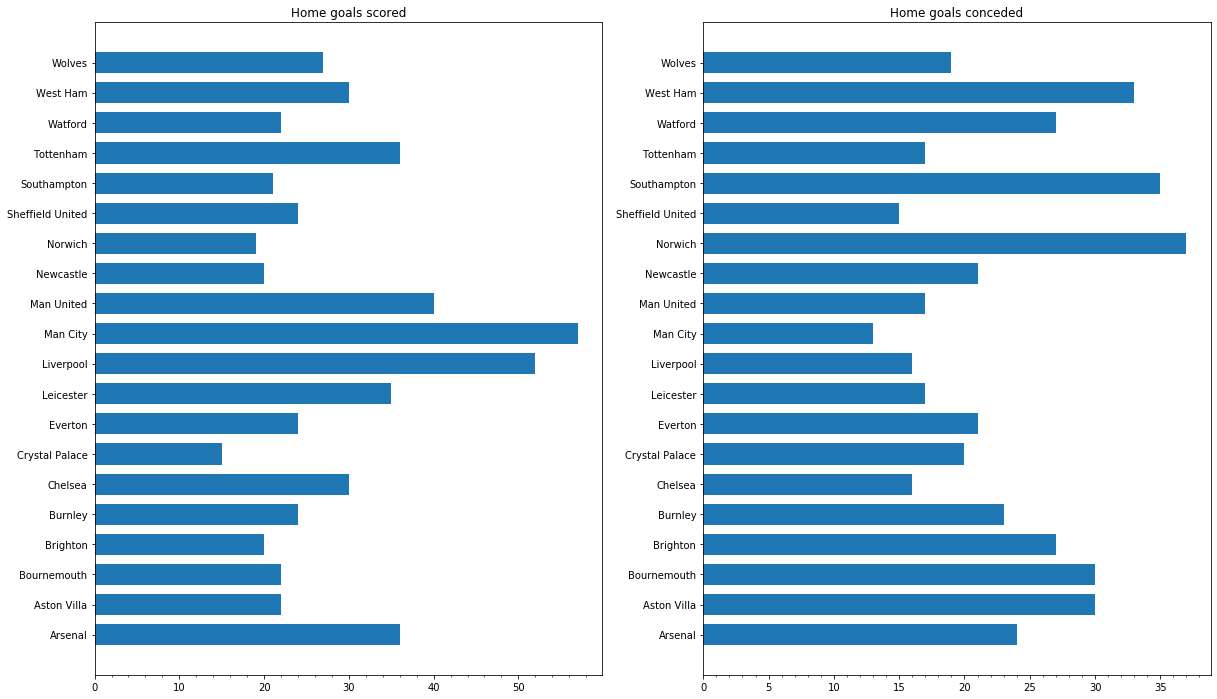

In [55]:
home_vis_goal()

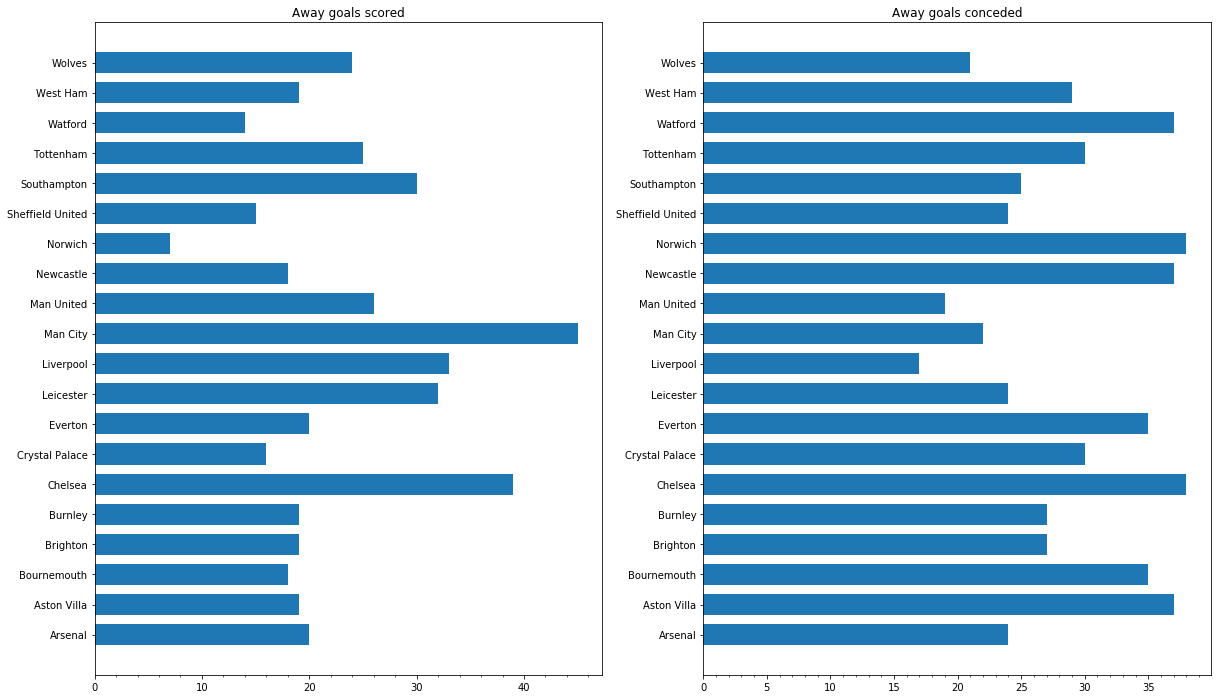

In [56]:
away_vis_goal()

# As we can see, we accomplished what we ought to. If another data set adds up to our 2 different leagues; we can easily adapt it to our code with not much changes. We processed our data set and obtained a properly visualizable data set. Every team in the both charts are properly lined up. We can generate some new charts as we wished.